In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Solving the KKT system

**T1:** Show that the predictor steps reduces to solve a linear system with matrix $M_{KKT}$


**C1:** Write down a routine function that implements the step-size substep.

In [2]:
def Newton_step(lamb0,dlamb,s0,ds):
    alp=1
    idx_lamb0=np.array(np.where(dlamb<0))
    if idx_lamb0.size>0:
        alp = min(alp,np.min(-lamb0[idx_lamb0]/dlamb[idx_lamb0]))
    idx_s0=np.array(np.where(ds<0))
    if idx_s0.size>0:
        alp = min(alp,np.min(-s0[idx_s0]/ds[idx_s0]))
    return alp

### 2.1 Inequality constraints case (i.e. with $A=0$)

**C2:**  Write down a program that, for a given $n$, implements the full algorithm for the test problem. Use the numpy.linalg.solve function to solve the KKT linear systems of the predictor and corrector substeps directly

iter 10
iter 20
iter 30
iter 40
iter 50
iter 60
iter 70
iter 80
iter 90
iter 100
iter 110
iter 120
iter 130
iter 140
iter 150
iter 160
iter 170
iter 180
iter 190
iter 200
iter 210
iter 220
iter 230
iter 240
iter 250
iter 260
iter 270
iter 280
iter 290
iter 300
iter 310
iter 320
iter 330
iter 340
iter 350
iter 360
iter 370
iter 380
iter 390
iter 400
iter 410
iter 420
iter 430
iter 440
iter 450
iter 460
iter 470
iter 480
iter 490
iter 500


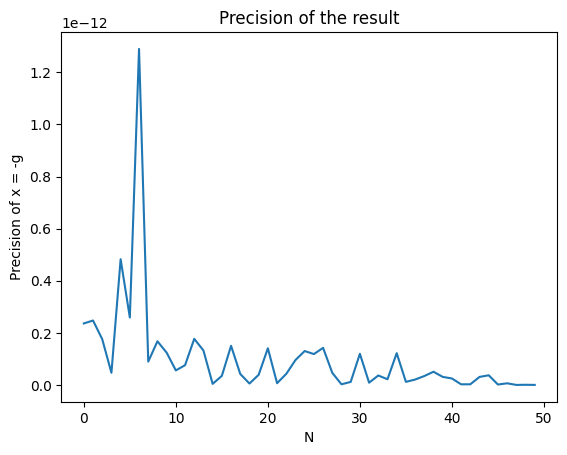

In [3]:
def evalF_noA(G,x,g,C,lamb,s,d):
    rL = np.dot(G,x) + g - np.dot(C, lamb)
    rC = s + d - np.dot(C.T, x)
    rS = s * lamb
    return np.concatenate((rL, rC, rS))


def C2_test(n, get_cond=False):
    dc = {"condition_numbers": [], "iterations": 0, "precision": 0}

    epsilon = 10e-16
    m = 2*n
    G = np.identity(n)
    C = np.column_stack((np.identity(n), -np.identity(n)))
    d = np.array([-10]*m)
    g = np.random.normal(0,1,n)

    x = np.zeros(n)
    s = np.ones(m)
    lamb = np.ones(m)
    z = np.concatenate((x,lamb,s))
    while True:
        M_kkt = np.row_stack((np.column_stack((G,                -C,                 np.zeros((n, m)))),
                            np.column_stack((-C.T,             np.zeros((m,m)),    np.identity(m))),
                            np.column_stack((np.zeros((m, n)), np.diag(s),         np.diag(lamb)))
        ))
        # Step 1 solve Newton step
        F_Z = evalF_noA(G,x,g,C,lamb,s,d)

        if np.linalg.norm(F_Z[:n]) < epsilon:
            break
        if np.linalg.norm(F_Z[n:n+m]) < epsilon:
            break

        d_z = np.linalg.solve(M_kkt, -F_Z)
        # Step 2 step size correction substep
        dlamb = d_z[n:n+m]
        ds = d_z[n+m:]
        alpha = Newton_step(lamb,dlamb,s,ds)
        # Step 3 compute sigma and mu
        mu = np.dot(s.T, lamb)/m

        if mu < epsilon:
            break

        mu_tilde = np.dot((s + alpha * ds).T, (lamb + alpha*dlamb))/m
        sigma = (mu_tilde/mu)**3
        # Step 4 corrector substep
        F_Z = np.concatenate((-F_Z[:n+m],-F_Z[n+m:]-ds*dlamb + np.full(m, sigma*mu)))
        d_z = np.linalg.solve(M_kkt, F_Z)
        # Step 5 step size correction substep
        dlamb = d_z[n:n+m]
        ds = d_z[n+m:]
        alpha = Newton_step(lamb,dlamb,s,ds)
        # Step 6 update substep
        z = z + 0.95*alpha*d_z
        x = z[:n]
        lamb = z[n:n+m]
        s = z[n+m:]
        dc["iterations"] += 1
        if get_cond: dc["condition_numbers"].append(np.linalg.cond(M_kkt))
        if dc["iterations"] > 100:
            break
    dc["precision"] = np.linalg.norm(z[:n] + g)/np.linalg.norm(g)
    return z, dc

precisions = []
cond_numbers = []
for i in range(10, 501, 10):
    print("iter", i)
    z, dc= C2_test(i)
    precisions.append(dc["precision"])

plt.plot(precisions)
plt.title("Precision of the result")
plt.xlabel("N")
plt.ylabel("Precision of x = -g")
plt.show()



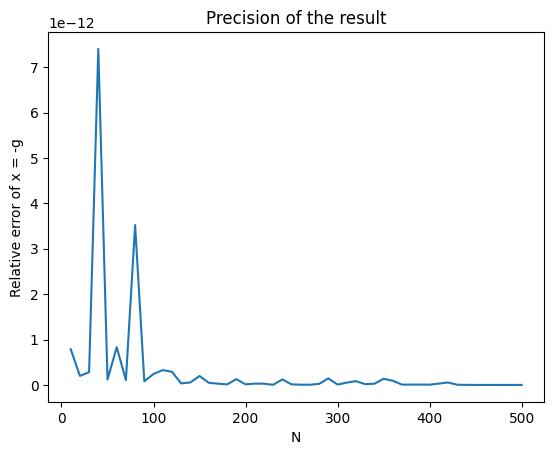

In [33]:

plt.plot([i*10 for i in range(1, 51)], precisions)
plt.title("Precision of the result")
plt.xlabel("N")
plt.ylabel("Relative error of x = -g")
plt.show()


**C3:**  Write a modification of the previous program **C2** to report the computation time of the solution of the test problem for different dimensions $n$

Elapsed time for computation: 0.0245s
Elapsed time for computation: 0.3217s
Elapsed time for computation: 1.2155s
Elapsed time for computation: 2.5460s
Elapsed time for computation: 2.5920s
Elapsed time for computation: 3.5995s
Elapsed time for computation: 4.0952s
Elapsed time for computation: 5.1314s
Elapsed time for computation: 1.1577s
Elapsed time for computation: 1.1406s
Elapsed time for computation: 1.2034s
Elapsed time for computation: 1.5890s
Elapsed time for computation: 1.9125s
Elapsed time for computation: 2.6051s
Elapsed time for computation: 2.5406s
Elapsed time for computation: 3.1132s
Elapsed time for computation: 3.4383s
Elapsed time for computation: 3.7309s
Elapsed time for computation: 3.8884s
Elapsed time for computation: 4.3982s
Elapsed time for computation: 4.9113s
Elapsed time for computation: 5.0212s
Elapsed time for computation: 5.9489s
Elapsed time for computation: 6.1134s
Elapsed time for computation: 6.6163s
Elapsed time for computation: 7.9589s
Elapsed time

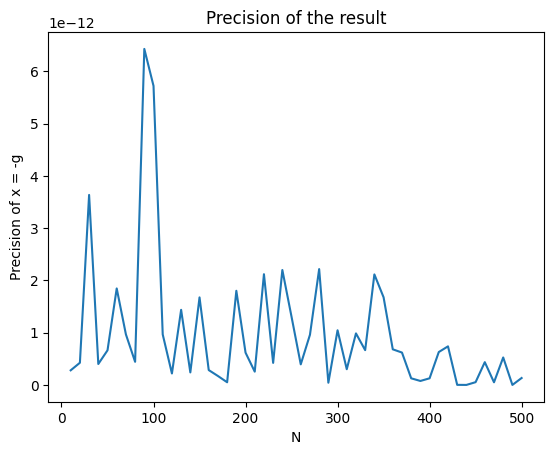

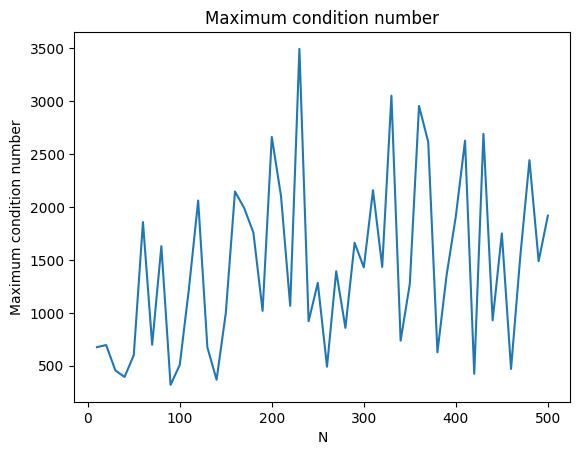

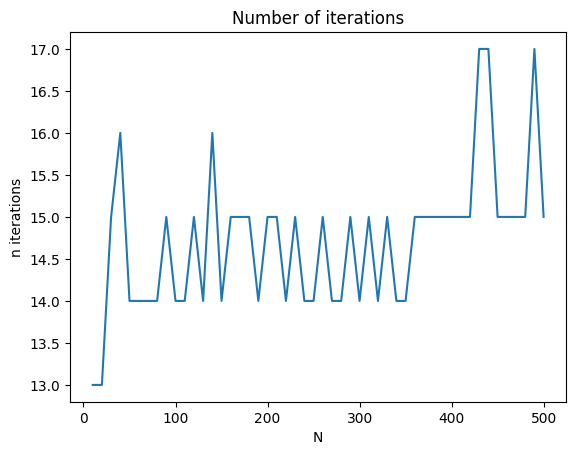

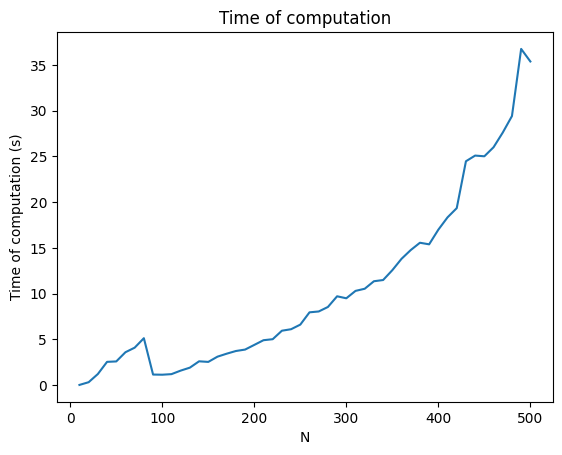

In [18]:
from timeit import default_timer as timer
def evalF_noA(G,x,g,C,lamb,s,d):
    rL = np.dot(G,x) + g - np.dot(C, lamb)
    rC = s + d - np.dot(C.T, x)
    rS = s * lamb
    return np.concatenate((rL, rC, rS))

def C3_test(n):
    dc = {"condition_numbers" : [], "iterations" : 0, "precision" : 0, "time" : 0}
    epsilon = 10e-16
    m = 2*n
    G = np.identity(n)
    C = np.column_stack((np.identity(n), -np.identity(n)))
    d = np.array([-10]*m)
    g = np.random.normal(0,1,n)

    x = np.zeros(n)
    s = np.ones(m)
    lamb = np.ones(m)
    z = np.concatenate((x,lamb,s))
    
    start = timer()
    while True:
        M_kkt = np.row_stack((np.column_stack((G,                -C,                 np.zeros((n, m)))),
                            np.column_stack((-C.T,             np.zeros((m,m)),    np.identity(m))),
                            np.column_stack((np.zeros((m, n)), np.diag(s),         np.diag(lamb)))
        ))
        # Step 1 solve Newton step
        F_Z = evalF_noA(G,x,g,C,lamb,s,d)

        if np.linalg.norm(F_Z[:n]) < epsilon:
            break
        if np.linalg.norm(F_Z[n:n+m]) < epsilon:
            break

        d_z = np.linalg.solve(M_kkt, -F_Z)
        # Step 2 step size correction substep
        dlamb = d_z[n:n+m]
        ds = d_z[n+m:]
        alpha = Newton_step(lamb,dlamb,s,ds)
        # Step 3 compute sigma and mu
        mu = np.dot(s.T, lamb)/m

        if mu < epsilon:
            break

        mu_tilde = np.dot((s + alpha * ds).T, (lamb + alpha*dlamb))/m
        sigma = (mu_tilde/mu)**3
        # Step 4 corrector substep
        F_Z = np.concatenate((-F_Z[:n+m],-F_Z[n+m:]-ds*dlamb + np.full(m, sigma*mu)))
        d_z = np.linalg.solve(M_kkt, F_Z)
        # Step 5 step size correction substep
        dlamb = d_z[n:n+m]
        ds = d_z[n+m:]
        alpha = Newton_step(lamb,dlamb,s,ds)
        # Step 6 update substep
        z = z + 0.95*alpha*d_z
        x = z[:n]
        lamb = z[n:n+m]
        s = z[n+m:]
        dc["iterations"] += 1
        dc["condition_numbers"].append(np.linalg.cond(M_kkt))
        if dc["iterations"] > 100:
            break
    end = timer()
    dc["precision"] = np.linalg.norm(z[:n] + g)
    dc["time"] = end - start
    print(f"Elapsed time for computation: {end - start:0.4f}s")
    return z, dc

precisions = []
cond_numbers = []
iters = []
times = []
for i in range(10, 501, 10):
    z, dc= C3_test(i)
    precisions.append(dc["precision"])
    cond_numbers.append(np.max(dc["condition_numbers"]))
    iters.append(dc["iterations"])
    times.append(dc["time"])

plt.plot([i*10 for i in range(1, 51)], precisions)
plt.title("Precision of the result")
plt.xlabel("N")
plt.ylabel("Precision of x = -g")
plt.show()

plt.title("Maximum condition number")
plt.xlabel("N")
plt.ylabel("Maximum condition number")
plt.plot([i*10 for i in range(1, 51)], cond_numbers)
plt.show()

plt.title("Number of iterations")
plt.xlabel("N")
plt.ylabel("n iterations")
plt.plot([i*10 for i in range(1, 51)], iters)
plt.show()

plt.title("Time of computation")
plt.xlabel("N")
plt.ylabel("Time of computation (s)")
plt.plot([i*10 for i in range(1, 51)], times)
plt.show()


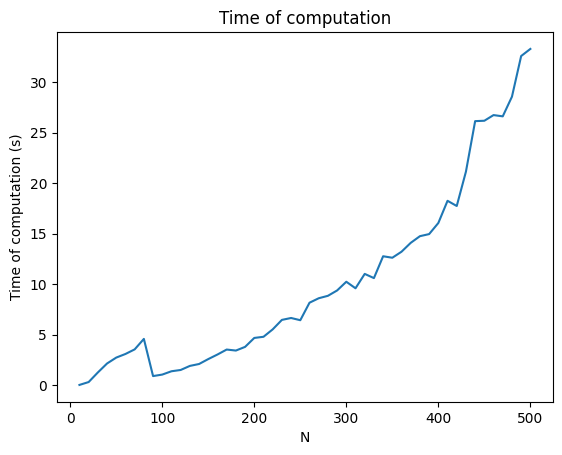

**C4:** Write down two programs (modifications of **C2**) that solve the optimization problem for the test problem using the previous strategies. Report the computational time for different values of $n$ and compare with the results in **C3**

Elapsed time for computation: 0.0040s
Elapsed time for computation: 0.0038s
Elapsed time for computation: 0.0083s
Elapsed time for computation: 0.0110s
Elapsed time for computation: 0.0144s
Elapsed time for computation: 0.0188s
Elapsed time for computation: 0.0246s
Elapsed time for computation: 0.0400s
Elapsed time for computation: 0.0602s
Elapsed time for computation: 0.0799s
Elapsed time for computation: 0.0993s
Elapsed time for computation: 0.1250s
Elapsed time for computation: 0.1471s
Elapsed time for computation: 0.1711s
Elapsed time for computation: 0.2006s
Elapsed time for computation: 0.2345s
Elapsed time for computation: 0.2946s
Elapsed time for computation: 0.3346s
Elapsed time for computation: 0.3561s
Elapsed time for computation: 0.4159s
Elapsed time for computation: 0.4280s
Elapsed time for computation: 0.5289s
Elapsed time for computation: 0.5728s
Elapsed time for computation: 0.5915s
Elapsed time for computation: 0.6549s
Elapsed time for computation: 0.7476s
Elapsed time

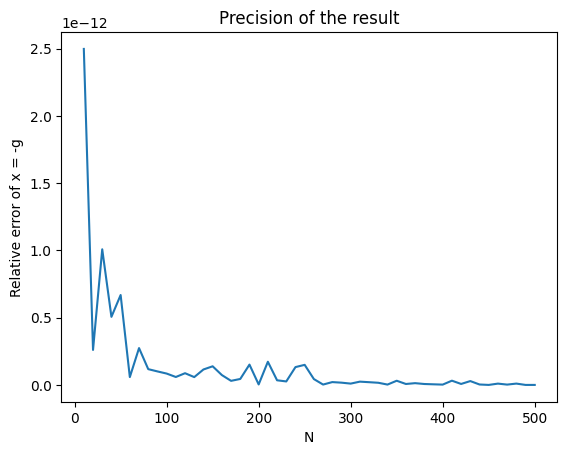

In [4]:
from scipy.linalg import solve_triangular
from scipy.linalg import ldl
from timeit import default_timer as timer

def C4_strategy_1(n, get_cond=False):
    dc = {"condition_numbers" : [], "iterations" : 0, "precision" : 0, "time" : 0}
    
    epsilon = 10e-16
    m = 2*n
    G = np.identity(n)
    C = np.column_stack((np.identity(n), -np.identity(n)))
    d = np.array([-10.]*m)
    g = np.random.normal(0.,1.,n)

    x = np.zeros(n)
    s = np.ones(m)
    lamb = np.ones(m)
    z0 = np.concatenate((x,lamb,s))
    
    start = timer()
    while True:
        M_kkt = np.row_stack((np.column_stack((G,                -C)),
                            np.column_stack((-C.T,              -np.dot(np.diag(1./lamb),np.diag(s))))
        ))
        
        lamb_inv = np.diag(1./lamb)
        # Step 1 solve Newton step
        F_Z = evalF_noA(G,x,g,C,lamb,s,d)

        r1 = F_Z[:n]
        r2 = F_Z[n:n+m]
        r3 = F_Z[n+m:]

        if np.linalg.norm(r1) < epsilon:
            break
        if np.linalg.norm(r2) < epsilon:
            break

        r_vector = -np.concatenate((r1, r2-np.dot(lamb_inv, r3)))

        L, D, _ = ldl(M_kkt)
        y = solve_triangular(L, r_vector, unit_diagonal=True, lower=True)
        d_z = solve_triangular(np.dot(D,L.T), y)

        # Step 2 step size correction substep
        dlamb = d_z[n:]
        ds = np.dot(lamb_inv,-r3-s*dlamb)
        alpha = Newton_step(lamb,dlamb,s,ds)
        # Step 3 compute sigma and mu
        mu = np.dot(s.T, lamb)/m

        if abs(mu) < epsilon:
            break

        mu_tilde = np.dot((s + alpha * ds).T, (lamb + alpha*dlamb))/m
        sigma = (mu_tilde/mu)**3

        # Step 4 corrector substep
        r3 = r3 + ds*dlamb - np.full(m, sigma*mu)
        r_vector = -np.concatenate((r1, 
                                    r2-np.dot(lamb_inv, r3)))
        
        y = solve_triangular(L, r_vector, unit_diagonal=True, lower=True)
        d_z = solve_triangular(np.dot(D,L.T), y)

        # Step 5 step size correction substep
        dlamb = d_z[n:]
        ds = np.dot(lamb_inv,-r3-s*dlamb)
        alpha = Newton_step(lamb,dlamb,s,ds)
        # Step 6 update substep
        z0 = z0 + 0.95*alpha*np.concatenate((d_z, ds))
        x = z0[:n]
        lamb = z0[n:n+m]
        s = z0[n+m:]
        
        dc["iterations"] += 1
        if get_cond: dc["condition_numbers"].append(np.linalg.cond(M_kkt))
        if dc["iterations"] > 100:
            break
    end = timer()
    dc["precision"] = np.linalg.norm(z0[:n] + g)/np.linalg.norm(g)
    dc["time"] = end - start
    print(f"Elapsed time for computation: {end - start:0.4f}s")
    return z0, dc

precisions = []
for i in range(10, 501, 10):
    z, dc= C4_strategy_1(i)
    precisions.append(dc["precision"])

plt.plot([i*10 for i in range(1, 51)], precisions)
plt.title("Precision of the result")
plt.xlabel("N")
plt.ylabel("Relative error of x = -g")
plt.show()

Elapsed time for computation: 0.0044s
Elapsed time for computation: 0.0049s
Elapsed time for computation: 0.0089s
Elapsed time for computation: 0.0122s
Elapsed time for computation: 0.0501s
Elapsed time for computation: 0.0257s
Elapsed time for computation: 0.0649s
Elapsed time for computation: 0.0466s
Elapsed time for computation: 0.1520s
Elapsed time for computation: 0.0668s
Elapsed time for computation: 0.1792s
Elapsed time for computation: 0.0768s
Elapsed time for computation: 0.2046s
Elapsed time for computation: 0.1309s
Elapsed time for computation: 0.1425s
Elapsed time for computation: 0.0727s
Elapsed time for computation: 0.1833s
Elapsed time for computation: 0.2272s
Elapsed time for computation: 0.1143s
Elapsed time for computation: 0.2323s
Elapsed time for computation: 0.2342s
Elapsed time for computation: 0.1606s
Elapsed time for computation: 0.3608s
Elapsed time for computation: 0.4797s
Elapsed time for computation: 0.2280s
Elapsed time for computation: 0.4988s
Elapsed time

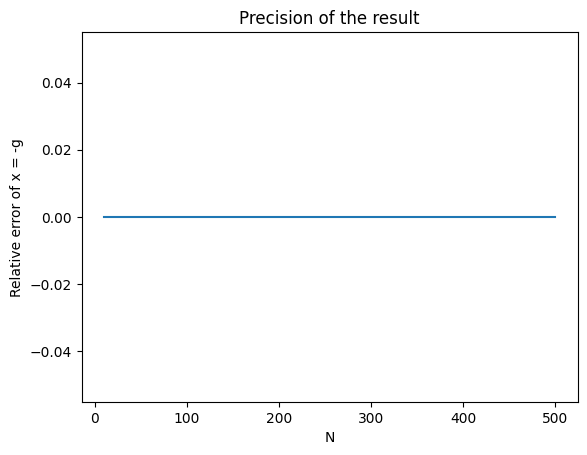

In [5]:
from scipy.linalg import solve_triangular
from timeit import default_timer as timer

def C4_strategy_2(n, get_cond=False):
    dc = {"condition_numbers" : [], "iterations" : 0, "precision" : 0, "time" : 0}
    
    epsilon = 10e-16
    m = 2*n
    G = np.identity(n)
    C = np.column_stack((np.identity(n), -np.identity(n)))
    d = np.array([-10.]*m)
    g = np.random.normal(0.,1.,n)

    x = np.zeros(n)
    s = np.ones(m)
    lamb = np.ones(m)
    z0 = np.concatenate((x,lamb,s))

    start = timer()
    while True:
        s_inv =np.diag(1./s)
        M_kkt = G+np.dot(C,np.dot(s_inv,np.dot(np.diag(lamb),C.T)))
        
        # Step 1 solve Newton step
        F_Z = evalF_noA(G,x,g,C,lamb,s,d)

        r1 = F_Z[:n]
        r2 = F_Z[n:n+m]
        r3 = F_Z[n+m:]

        if np.linalg.norm(r1) < epsilon:
            break
        if np.linalg.norm(r2) < epsilon:
            break

        r_vector = -r1+np.dot(C,np.dot(s_inv, -r3 + np.dot(np.diag(lamb),r2)))

        L = np.linalg.cholesky(M_kkt)
        y = solve_triangular(L, r_vector, lower=True)
        dx = solve_triangular(L.T, y)
        
        # Step 2 step size correction substep
        dlamb = np.dot(s_inv, -r3+np.dot(np.diag(lamb), r2)) - np.dot(s_inv,np.dot(np.diag(lamb), np.dot(C.T, dx)))
        ds = -r2+np.dot(C.T,dx)
        alpha = Newton_step(lamb,dlamb,s,ds)
        # Step 3 compute sigma and mu
        mu = np.dot(s.T, lamb)/m

        if abs(mu) < epsilon:
            break

        mu_tilde = np.dot((s + alpha * ds).T, (lamb + alpha*dlamb))/m
        sigma = (mu_tilde/mu)**3

        # Step 4 corrector substep
        r3 = r3 + ds*dlamb - np.full(m, sigma*mu)
        r_vector = -r1+np.dot(C,np.dot(s_inv, -r3 - ds*dlamb + np.full(m, sigma*mu)))
        
        y = solve_triangular(L, r_vector, lower=True)
        dx = solve_triangular(L.T, y)

        # Step 5 step size correction substep
        dlamb = np.dot(s_inv, -r3+np.dot(np.diag(lamb), r2)) - np.dot(s_inv,np.dot(np.diag(lamb), np.dot(C.T, dx)))
        ds = -r2+np.dot(C.T,dx)
        alpha = Newton_step(lamb,dlamb,s,ds)
        # Step 6 update substep
        z0 = z0 + 0.95*alpha*np.concatenate((dx, dlamb, ds))
        x = z0[:n]
        lamb = z0[n:n+m]
        s = z0[n+m:]
        
        dc["iterations"] += 1
        if get_cond: dc["condition_numbers"].append(np.linalg.cond(M_kkt))
        if dc["iterations"] > 100:
            break
    end = timer()
    dc["precision"] = np.linalg.norm(z0[:n] + g)/np.linalg.norm(g)
    dc["time"] = end - start
    print(f"Elapsed time for computation: {end - start:0.4f}s")
    return z0, dc

precisions = []
for i in range(10, 501, 10):
    z, dc= C4_strategy_2(i)
    precisions.append(dc["precision"])

plt.plot([i*10 for i in range(1, 51)], precisions)
plt.title("Precision of the result")
plt.xlabel("N")
plt.ylabel("Relative error of x = -g")
plt.show()

### 2.2 General case (with equality and inequality constraints)

**C5:** Write down a program that solves the optimization problem for the general case. Use numpy.linalg.solve function. Read the data of the optimization problems from the files (available at the Campus Virtual). Each problem consists on a collection of files: G.dad, g.dad, A.dad, b.dad, C.dad and d.dad. They contain the corresponding data in coordinate format.
Take as initial condition $x_0 = (0, . . . , 0)$ and $s_0 = γ_0 = λ_0 = (1, . . . , 1)$ for all problems.

In [29]:
def open_matrix(path, n, m):
    mtx = np.zeros((n,m))
    with open(path) as file:
        for x in file.readlines():
            tmp = np.array(x.split()).astype(float)
            mtx[tmp[0].astype(int)-1, tmp[1].astype(int)-1] = tmp[2]
    return mtx

def open_vector(path, n):
    vector = np.zeros(n)
    with open(path) as file:
        for x in file.readlines():
            tmp = np.array(x.split()).astype(float)
            vector[tmp[0].astype(int)-1] = tmp[1]
    return vector

n = 1000
p = 500
m = 2000

A = open_matrix("./optpr2/A.dad", n, p)
b = open_vector("./optpr2/b.dad", p)
C = open_matrix("./optpr2/C.dad", n, m)
d = open_vector("./optpr2/d.dad", m)
G = open_matrix("./optpr2/G.dad", n, n)
g = open_vector("./optpr2/g_vector.dad", n)

G = G + G.T -np.diag(np.diag(G))


print(A.shape, b.shape, C.shape, d.shape, G.shape, g.shape)

def check_symmetric(a, rtol=1e-05, atol=1e-08):
    return np.allclose(a, a.T, rtol=rtol, atol=atol)

print(check_symmetric(G))

(1000, 500) (500,) (1000, 2000) (2000,) (1000, 1000) (1000,)
True


In [26]:
from timeit import default_timer as timer

def evalF(G, x, g, A, gamma, C, lamb, b, s, d):
    rL = np.dot(G,x) + g - np.dot(A, gamma) - np.dot(C, lamb)
    rA = b - np.dot(A.T,x)
    rC = s + d - np.dot(C.T, x)
    rS = np.multiply(s,lamb)
    return np.concatenate((rL, rA, rC, rS))

def C5_general(A, b, C, d, G, g):
    epsilon = 10e-16
    m = d.shape[0]
    n = A.shape[0]
    p = A.shape[1]
    
    x = np.zeros(n)
    gamma = np.ones(p)
    lamb = np.ones(m)
    s = np.ones(m)
    
    z = np.concatenate((x,gamma,lamb,s))
    k = 0
    start = timer()
    while True:
        M_kkt = np.row_stack((np.column_stack((G,                   -A,                 -C,                 np.zeros((n, m)))),
                            np.column_stack((-A.T,                  np.zeros((p,p)),    np.zeros((p,m)),    np.zeros((p, m)))),
                            np.column_stack((-C.T,                  np.zeros((m,p)),    np.zeros((m,m)),    np.identity(m))),
                            np.column_stack((np.zeros((m, n)),      np.zeros((m,p)),    np.diag(s),         np.diag(lamb)))
        ))
        # Step 1 solve Newton step
        F_Z = evalF(G, x, g, A, gamma, C, lamb, b, s, d)

        r1 = F_Z[:n]            # rL
        r2 = F_Z[n:n+p]         # rA
        r3 = F_Z[n+p:n+p+m]     # rC
        r4 = F_Z[n+p+m:]        # rs
        
        if np.linalg.norm(r1) < epsilon:
            break
        if np.linalg.norm(r2) < epsilon:
            break
        if np.linalg.norm(r3) < epsilon:
            break
        r_vector = -np.concatenate((r1, r2, r3, r4))
        delta = np.linalg.solve(M_kkt, r_vector)
        # Step 2 step size correction substep
        dlamb = delta[n+p:n+p+m]
        ds = delta[n+p+m:]
        alpha = Newton_step(lamb,dlamb,s,ds)
        # Step 3 compute sigma and mu
        mu = np.dot(s.T, lamb)/m

        if abs(mu) < epsilon:
            break

        mu_tilde = np.dot((s + alpha * ds).T, (lamb + alpha*dlamb))/m
        sigma = np.power(mu_tilde/mu, 3)
        # Step 4 corrector substep
        r_vector = np.concatenate((-r1,-r2,-r3, -r4 - np.multiply(ds,dlamb) + np.full(m, sigma*mu)))
        delta = np.linalg.solve(M_kkt, r_vector)
        # Step 5 step size correction substep
        dlamb = delta[n+p:n+p+m]
        ds = delta[n+p+m:]

        alpha = Newton_step(lamb,dlamb,s,ds)
        # Step 6 update substep
        z = z + 0.95*alpha*delta
        x = z[:n]
        gamma = z[n:n+p]
        lamb = z[n+p:n+p+m]
        s = z[n+p+m:]
        k+=1
        if k > 100:
            break
    end = timer()
    print(f"Elapsed time for computation: {end - start:0.4f}s")
    return z

z = C5_general(A, b, C, d, G, g)
evalx = z[:n]

print("f(x) =",(1/2)*np.dot(evalx.T, np.dot(G, evalx)) + np.dot(g.T, evalx))


Elapsed time for computation: 59.8986s
f(x) = 1087511.5673215007


**C6:** Implement a routine that uses $LDL^T$ to solve the optimizations problems (in **C5**) and compare the results.

In [30]:
from timeit import default_timer as timer
from scipy.linalg import lapack

def C6_general(A, b, C, d, G, g):
    epsilon = 10e-16
    m = d.shape[0]
    n = A.shape[0]
    p = A.shape[1]
    
    x = np.zeros(n)
    gamma = np.ones(p)
    lamb = np.ones(m)
    s = np.ones(m)
    
    z = np.concatenate((x,gamma,lamb,s))
    k = 0
    start = timer()
    while True:
        lamb_inv = np.diag(1./lamb)
        M_kkt = np.row_stack((np.column_stack((G,                   -A,                 -C)),
                            np.column_stack((-A.T,                  np.zeros((p,p)),    np.zeros((p,m)))),
                            np.column_stack((-C.T,                  np.zeros((m,p)),    -np.dot(lamb_inv,np.diag(s))))
        ))
        # Step 1 solve Newton step
        F_Z = evalF(G, x, g, A, gamma, C, lamb, b, s, d)

        r1 = F_Z[:n]            # rL
        r2 = F_Z[n:n+p]         # rA
        r3 = F_Z[n+p:n+p+m]     # rC
        r4 = F_Z[n+p+m:]        # rs
        
        if np.linalg.norm(r1) < epsilon:
            break
        if np.linalg.norm(r2) < epsilon:
            break
        if np.linalg.norm(r3) < epsilon:
            break
        
        r_vector = np.concatenate((-r1, -r2, -r3 + np.dot(lamb_inv, r4)))

        delta = lapack.dsysv(M_kkt, r_vector)[2]
        # Step 2 step size correction substep
        dlamb = delta[n+p:n+p+m]
        ds = np.dot(lamb_inv, -r4 - np.dot(np.diag(s),dlamb))
        alpha = Newton_step(lamb,dlamb,s,ds)
        # Step 3 compute sigma and mu
        mu = np.dot(s.T, lamb)/m

        if abs(mu) < epsilon:
            break

        mu_tilde = np.dot((s + alpha * ds).T, (lamb + alpha*dlamb))/m
        sigma = np.power(mu_tilde/mu, 3)
        # Step 4 corrector substep
        r4 = r4 + ds*dlamb - np.full(m, sigma*mu)
        r_vector = -np.concatenate((r1,r2,r3 - np.dot(lamb_inv, r4)))
        
        delta = lapack.dsysv(M_kkt, r_vector)[2]
        # Step 5 step size correction substep
        dlamb = delta[n+p:n+p+m]
        ds = np.dot(lamb_inv, - r4 - s*dlamb)

        alpha = Newton_step(lamb,dlamb,s,ds)
        # Step 6 update substep
        z = z + 0.95*alpha*np.concatenate((delta, ds))
        x = z[:n]
        gamma = z[n:n+p]
        lamb = z[n+p:n+p+m]
        s = z[n+p+m:]
        k+=1
        if k > 100:
            break
    end = timer()
    print(f"Elapsed time for computation: {end - start:0.4f}s")
    return z

z = C6_general(A, b, C, d, G, g)
evalx = z[:n]

print("f(x) =",(1/2)*np.dot(evalx.T, np.dot(G, evalx)) + np.dot(g.T, evalx))


Elapsed time for computation: 21.8845s
f(x) = 1087511.5673215005
